# Nigerian airports
**Author: Mofopeofluwa Onadeko**


In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import numpy as np
import seaborn as sns

#import important libraries

In [257]:
edges_data=pd.read_csv('edges.csv')
edges_data.head(5)

#extract edge data

,# source,target,distance,airline,airline_code,codeshare,equipment,stops
0,0,2,124.520121,CG,1308,0,DH8 DHT,0
1,0,3,157.150822,CG,1308,0,DH8,0
2,0,1,106.747399,CG,1308,0,DH8,0
3,0,4,424.726096,CG,1308,0,DH8,0
4,0,4,424.726096,PX,328,0,DH4 DH8 DH3,0


In [258]:
nodes_data=pd.read_csv('nodes.csv')
nigerian_nodes=nodes_data[nodes_data[' country']=='Nigeria']
nigerian_nodes

#extract node data and refine it to nodes located in Nigeria

,# index,id,name,city,country,IATA/FAA,ICAO,latitude,longitude,altitude,timezone,DST,_pos
161,161,260,Nnamdi Azikiwe International Airport,Abuja,Nigeria,ABV,DNAA,9.00679,7.26317,1123,1.0,N,"array([5.89227097, 1.22581984])"
162,162,262,Benin Airport,Benin,Nigeria,BNI,DNBE,6.31698,5.59950,258,1.0,N,"array([5.82652138, 1.24947111])"
163,163,263,Margaret Ekpo International Airport,Calabar,Nigeria,CBQ,DNCA,4.97602,8.34720,210,1.0,N,"array([5.83364483, 1.25688692])"
164,164,264,Akanu Ibiam International Airport,Enugu,Nigeria,ENU,DNEN,6.47427,7.56196,466,1.0,N,"array([5.8611661 , 1.26900437])"
165,165,266,Ibadan Airport,Ibadan,Nigeria,IBA,DNIB,7.36246,3.97833,725,1.0,N,"array([5.77849562, 1.28440042])"
166,166,267,Ilorin International Airport,Ilorin,Nigeria,ILR,DNIL,8.44021,4.49392,1126,1.0,N,"array([5.7667102 , 1.27778974])"
167,167,268,Yakubu Gowon Airport,Jos,Nigeria,JOS,DNJO,9.63983,8.86905,4232,1.0,N,"array([5.80795479, 1.24882712])"
168,168,269,Kaduna Airport,Kaduna,Nigeria,KAD,DNKA,10.69600,7.32011,2073,1.0,N,"array([5.81608725, 1.2657922 ])"
169,169,270,Mallam Aminu International Airport,Kano,Nigeria,KAN,DNKN,12.04760,8.52462,1562,1.0,N,"array([5.93521986, 1.25622718])"
170,170,273,Murtala Muhammed International Airport,Lagos,Nigeria,LOS,DNMM,6.57737,3.32116,135,1.0,N,"array([5.93753793, 1.20869642])"


In [259]:
ng_nodes=nodes_data[nodes_data[' country']=='Nigeria']
airport_id=ng_nodes['# index']
ng_city_nodes=pd.DataFrame(index=airport_id)

ng_city_nodes['airport']=nigerian_nodes[' IATA/FAA']
ng_city_nodes['city']=nigerian_nodes[' city']
ng_city_nodes

#Create dataframe of airports in nigeria and their corresponding cities

,airport,city
# index,,
161,ABV,Abuja
162,BNI,Benin
163,CBQ,Calabar
164,ENU,Enugu
165,IBA,Ibadan
166,ILR,Ilorin
167,JOS,Jos
168,KAD,Kaduna
169,KAN,Kano


In [260]:
zero=[0, 0, 0, 0, 0, 0, 0, 0]
column_name_dict=dict.fromkeys(edges_data.columns.to_list(),[0,0])

column_name_dict

#Create dictionary for column names of edgelist

{'# source': [0, 0],
 ' target': [0, 0],
 ' distance': [0, 0],
 ' airline': [0, 0],
 ' airline_code': [0, 0],
 ' codeshare': [0, 0],
 ' equipment': [0, 0],
 ' stops': [0, 0]}

In [261]:
ng_edges=pd.DataFrame(data=column_name_dict)


for i in range(len(nodes_data['# index'])):
    if edges_data['# source'][i] in nodes.index or edges_data[' target'][i] in nodes.index:
        ng_edges.loc[i]=edges_data.loc[i]
        
                
ng_edges=ng_edges.drop([0, 1])      
ng_edges 

#create edgelist comprising of edges in and out of nigeria

,# source,target,distance,airline,airline_code,codeshare,equipment,stops
1981,153,170,106.394058,AT,4248,0,738,0
1992,153,161,613.209062,ET,2220,1,DH8,0
2017,153,170,106.394058,W3,20976,0,CR9 73G,0
2055,156,170,400.637086,3G,595,0,319,0
2061,156,170,400.637086,AW,16960,0,ER4,0
...,...,...,...,...,...,...,...,...
2277,173,161,568.144830,W3,20976,0,CR9 73G,0
2287,174,161,744.735046,ET,2220,1,DH8,0
2448,182,161,733.938471,ET,2220,1,DH8,0
2457,182,170,232.998365,ET,2220,0,73W,0


In [263]:
g=nx.from_pandas_edgelist(ng_edges,'# source',' target')
pos=nx.kamada_kawai_layout(g)

label_dict={}

for i in ng_city_nodes.index.tolist():
    label_dict[i]=ng_city_nodes['city'][i]
    
label_dict

#create label dictionary with ng_city_nodes data index and their corresponding cities

{161: 'Abuja',
 162: 'Benin',
 163: 'Calabar',
 164: 'Enugu',
 165: 'Ibadan',
 166: 'Ilorin',
 167: 'Jos',
 168: 'Kaduna',
 169: 'Kano',
 170: 'Lagos',
 171: 'Port Hartcourt',
 172: 'Sokoto',
 173: 'Yola',
 2868: 'Imo',
 2946: 'Osubi',
 3185: 'Uyo'}

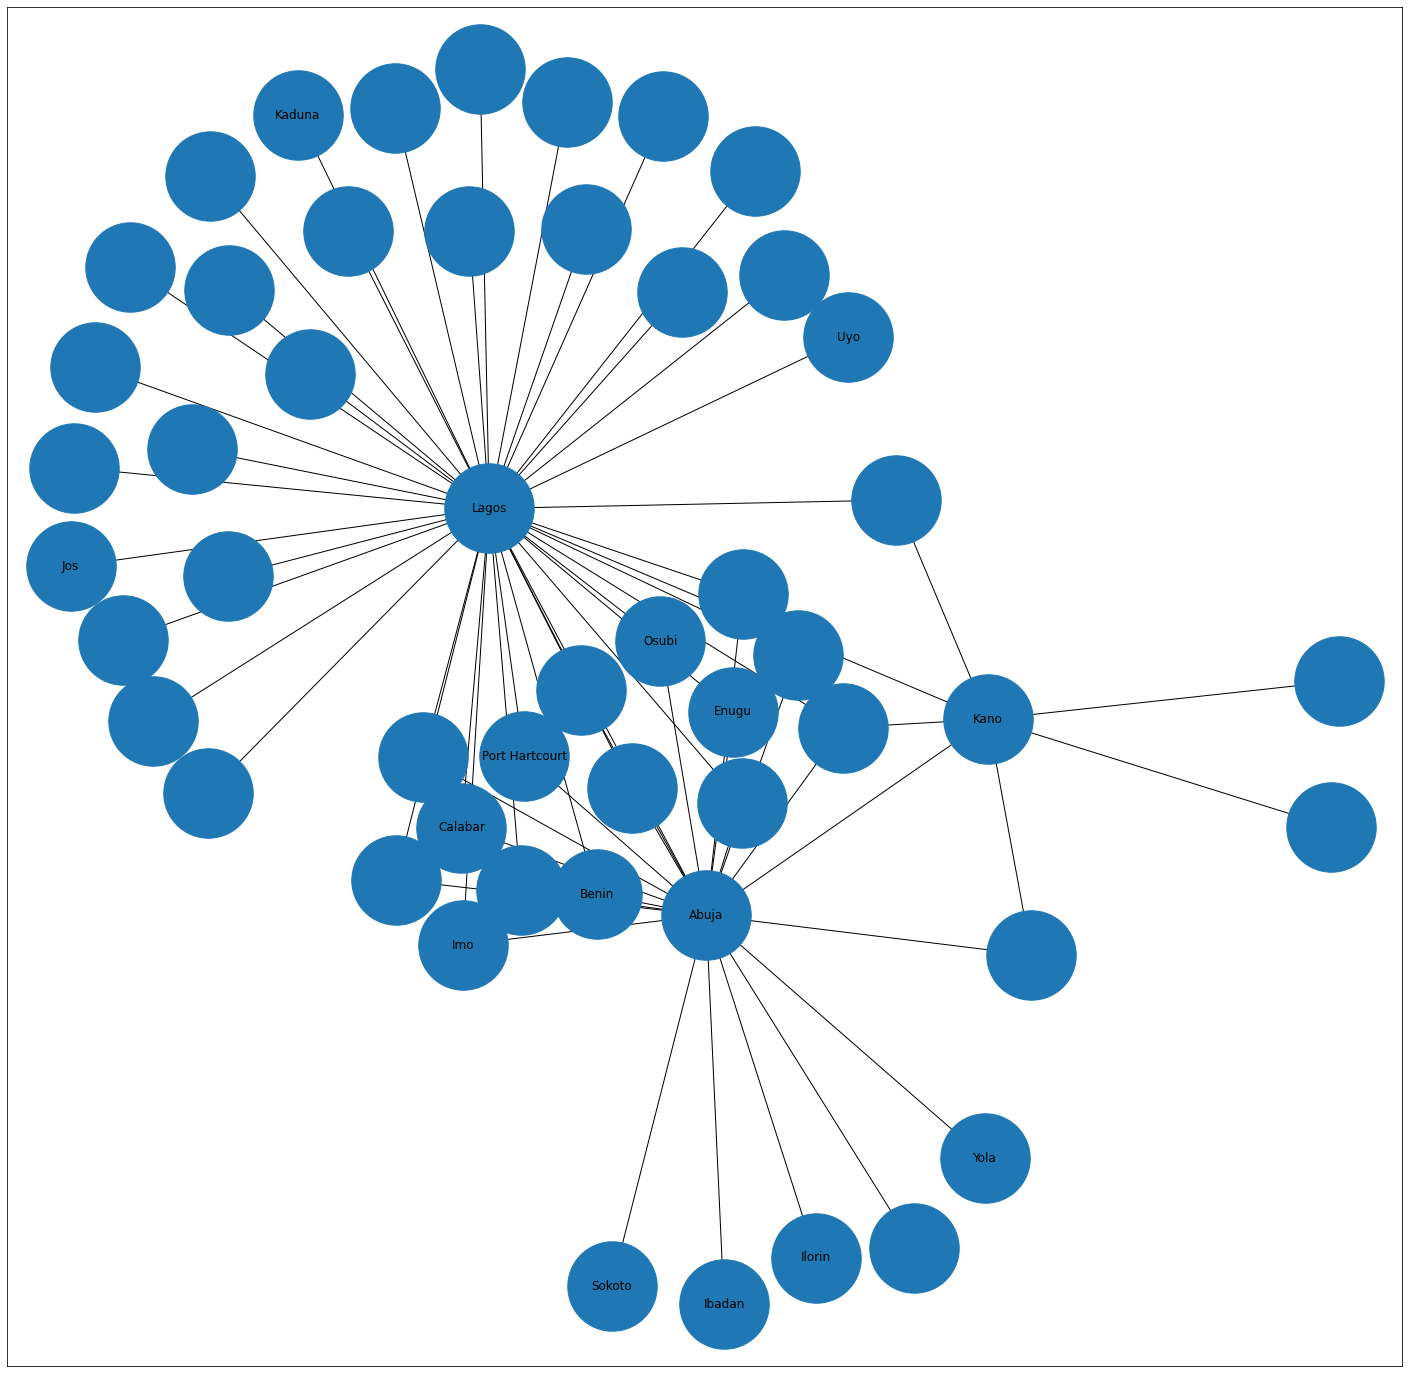

In [265]:
fig, ax = plt.subplots(1, 1, figsize=(25, 25))

nx.draw_networkx(g, ax=ax, with_labels=True, node_size=8000, labels=label_dict)

#plot network graph of flights in and out of Nigeria

In [266]:
degree=g.degree
sorted(degree, key=lambda x: x[1], reverse=True)[:10]

#calculate degree of each node

[(170, 42),
 (161, 23),
 (169, 7),
 (508, 3),
 (523, 3),
 (164, 3),
 (153, 2),
 (156, 2),
 (628, 2),
 (171, 2)]

In [267]:
degree_centrality=nx.degree_centrality(g)
sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#calculate degree centrality of each node

[(170, 0.84),
 (161, 0.46),
 (169, 0.14),
 (508, 0.06),
 (523, 0.06),
 (164, 0.06),
 (153, 0.04),
 (156, 0.04),
 (628, 0.04),
 (171, 0.04)]

In [268]:
closeness_centrality=nx.closeness_centrality(g)
sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

#calculate closeness centrality of each node

[(170, 0.8620689655172413),
 (161, 0.6493506493506493),
 (169, 0.5376344086021505),
 (523, 0.5154639175257731),
 (508, 0.5050505050505051),
 (164, 0.5050505050505051),
 (153, 0.5),
 (156, 0.5),
 (628, 0.5),
 (171, 0.5)]

In [269]:
betweenness_centrality=nx.betweenness_centrality(g)
sorted(betweenness_centrality.items(), key=lambda x: x[0], reverse=False)[:10]

#calculate betweenness centrality of each node

[(153, 0.0),
 (156, 0.0),
 (160, 0.0),
 (161, 0.27346938775510204),
 (162, 0.0),
 (163, 0.0),
 (164, 0.0),
 (165, 0.0),
 (166, 0.0),
 (167, 0.0)]

In [270]:
eigenvector_centrality=nx.eigenvector_centrality_numpy(g)

max_value=max(eigenvector_centrality.items(),key=lambda x: x[1])


sorted_eigenvector_centrality={}
for i in eigenvector_centrality.keys():
    sorted_eigenvector_centrality[i]=eigenvector_centrality[i]/max_value[1]

sorted(sorted_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10] 

#calculate eigenvector centrality of each node

[(170, 1.0),
 (161, 0.686967823214105),
 (169, 0.30238852906706754),
 (523, 0.25896022254707796),
 (508, 0.25246101480613836),
 (164, 0.25246101480613803),
 (153, 0.21959744036222792),
 (2946, 0.21959744036222792),
 (255, 0.21959744036222786),
 (182, 0.21959744036222786)]

In [271]:
edge_betweenness=nx.edge_betweenness_centrality(g).items()
sorted(edge_betweenness, key=lambda x: x[1], reverse=True)[:10]

#calculate edge betweenness of each node

[((170, 161), 0.12980392156862744),
 ((170, 169), 0.08509803921568627),
 ((170, 160), 0.0392156862745098),
 ((170, 167), 0.0392156862745098),
 ((170, 168), 0.0392156862745098),
 ((170, 500), 0.0392156862745098),
 ((170, 404), 0.0392156862745098),
 ((170, 486), 0.0392156862745098),
 ((170, 492), 0.0392156862745098),
 ((170, 474), 0.0392156862745098)]

In [272]:
page_rank=nx.pagerank(g)
{k: v for k, v in sorted(page_rank.items(), key=lambda item: item[1], reverse=True)}

#calculate page rank of each node

{170: 0.2865667946583785,
 161: 0.1435943674113041,
 169: 0.04611358618359465,
 523: 0.01964759838711841,
 508: 0.01960178854181843,
 164: 0.01960178854181843,
 1014: 0.014340574069420128,
 153: 0.014048113121183498,
 156: 0.014048113121183498,
 628: 0.014048113121183498,
 171: 0.014048113121183498,
 255: 0.014048113121183498,
 182: 0.014048113121183498,
 191: 0.014048113121183498,
 401: 0.014048113121183498,
 162: 0.014048113121183498,
 163: 0.014048113121183498,
 2868: 0.014048113121183498,
 2946: 0.014048113121183498,
 454: 0.013847686054221427,
 160: 0.008741088803485217,
 167: 0.008741088803485217,
 168: 0.008741088803485217,
 500: 0.008741088803485217,
 404: 0.008741088803485217,
 486: 0.008741088803485217,
 492: 0.008741088803485217,
 474: 0.008741088803485217,
 1809: 0.008741088803485217,
 1017: 0.008741088803485217,
 441: 0.008741088803485217,
 1015: 0.008741088803485217,
 578: 0.008741088803485217,
 282: 0.008741088803485217,
 2040: 0.008741088803485217,
 3204: 0.008741088803

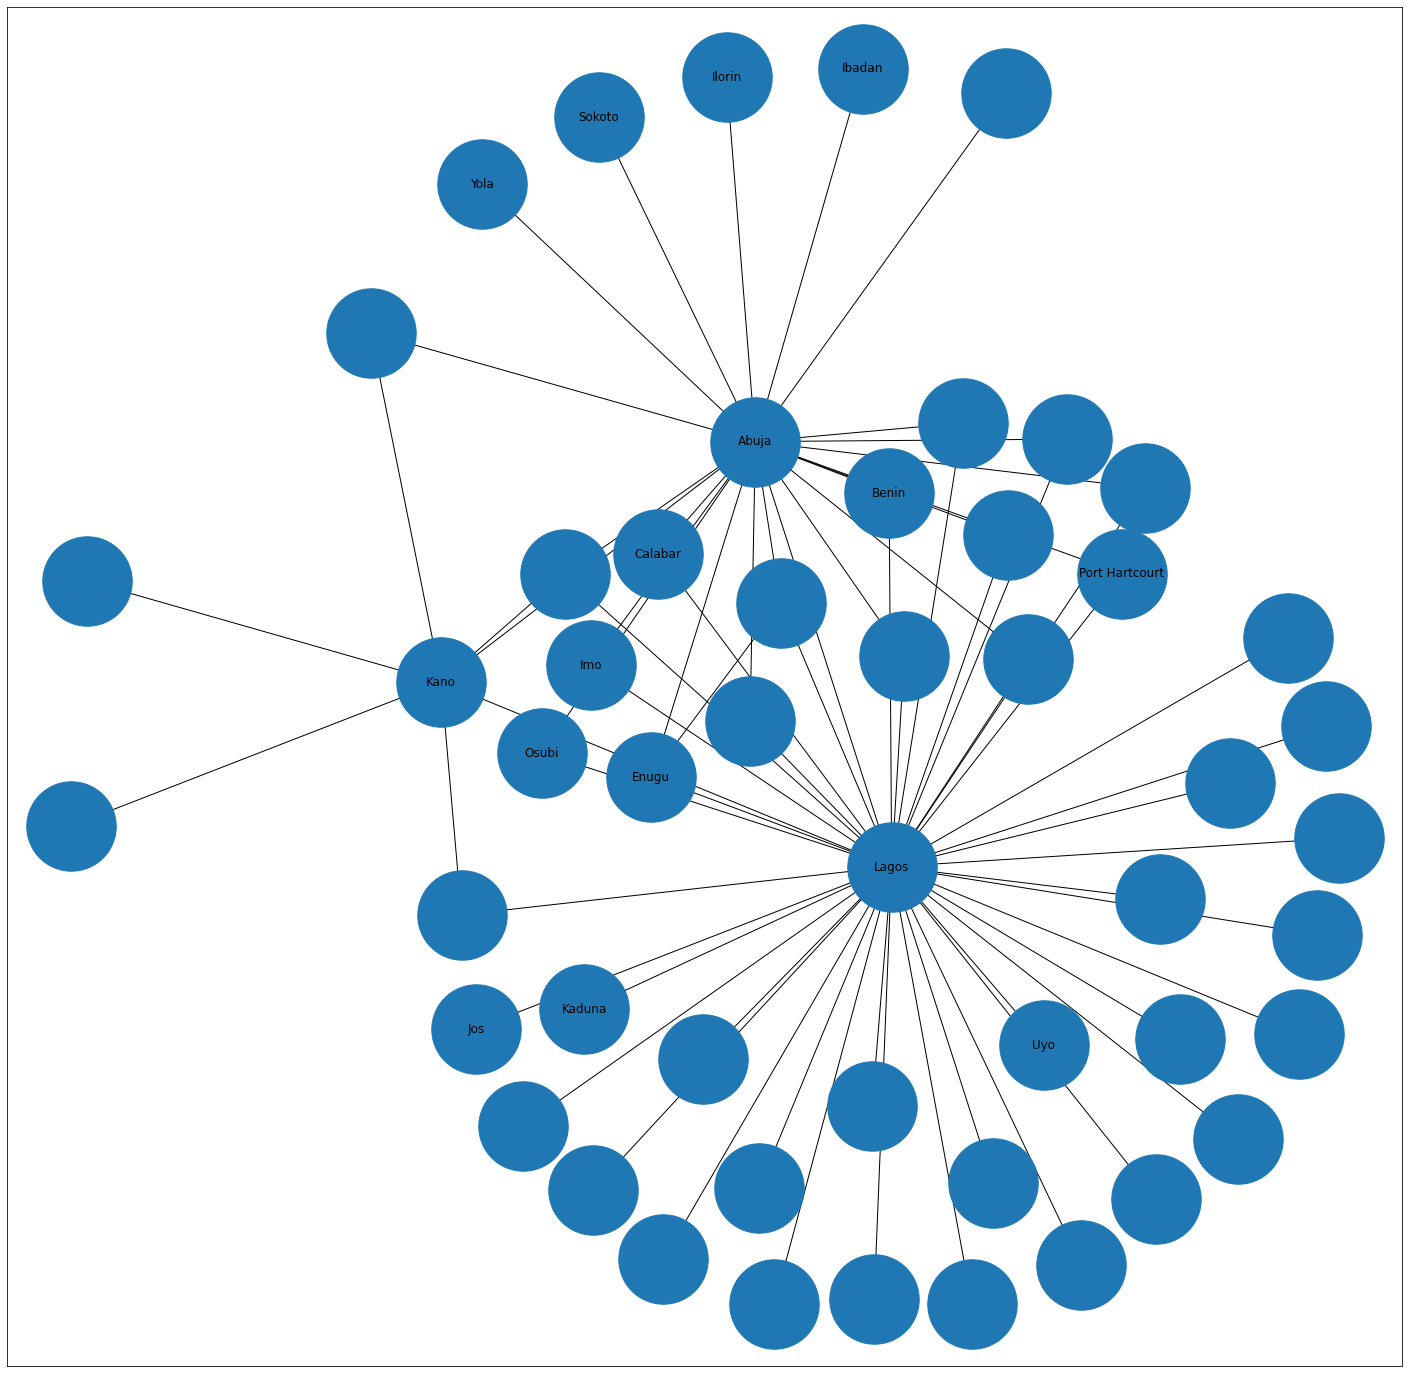

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(25, 25))

nx.draw_networkx(g, ax=ax, with_labels=True, pos=pos, node_size=8000, labels=label_dict)

#plot the network of flights in and out of nigeria using kamada_kawai_layout  

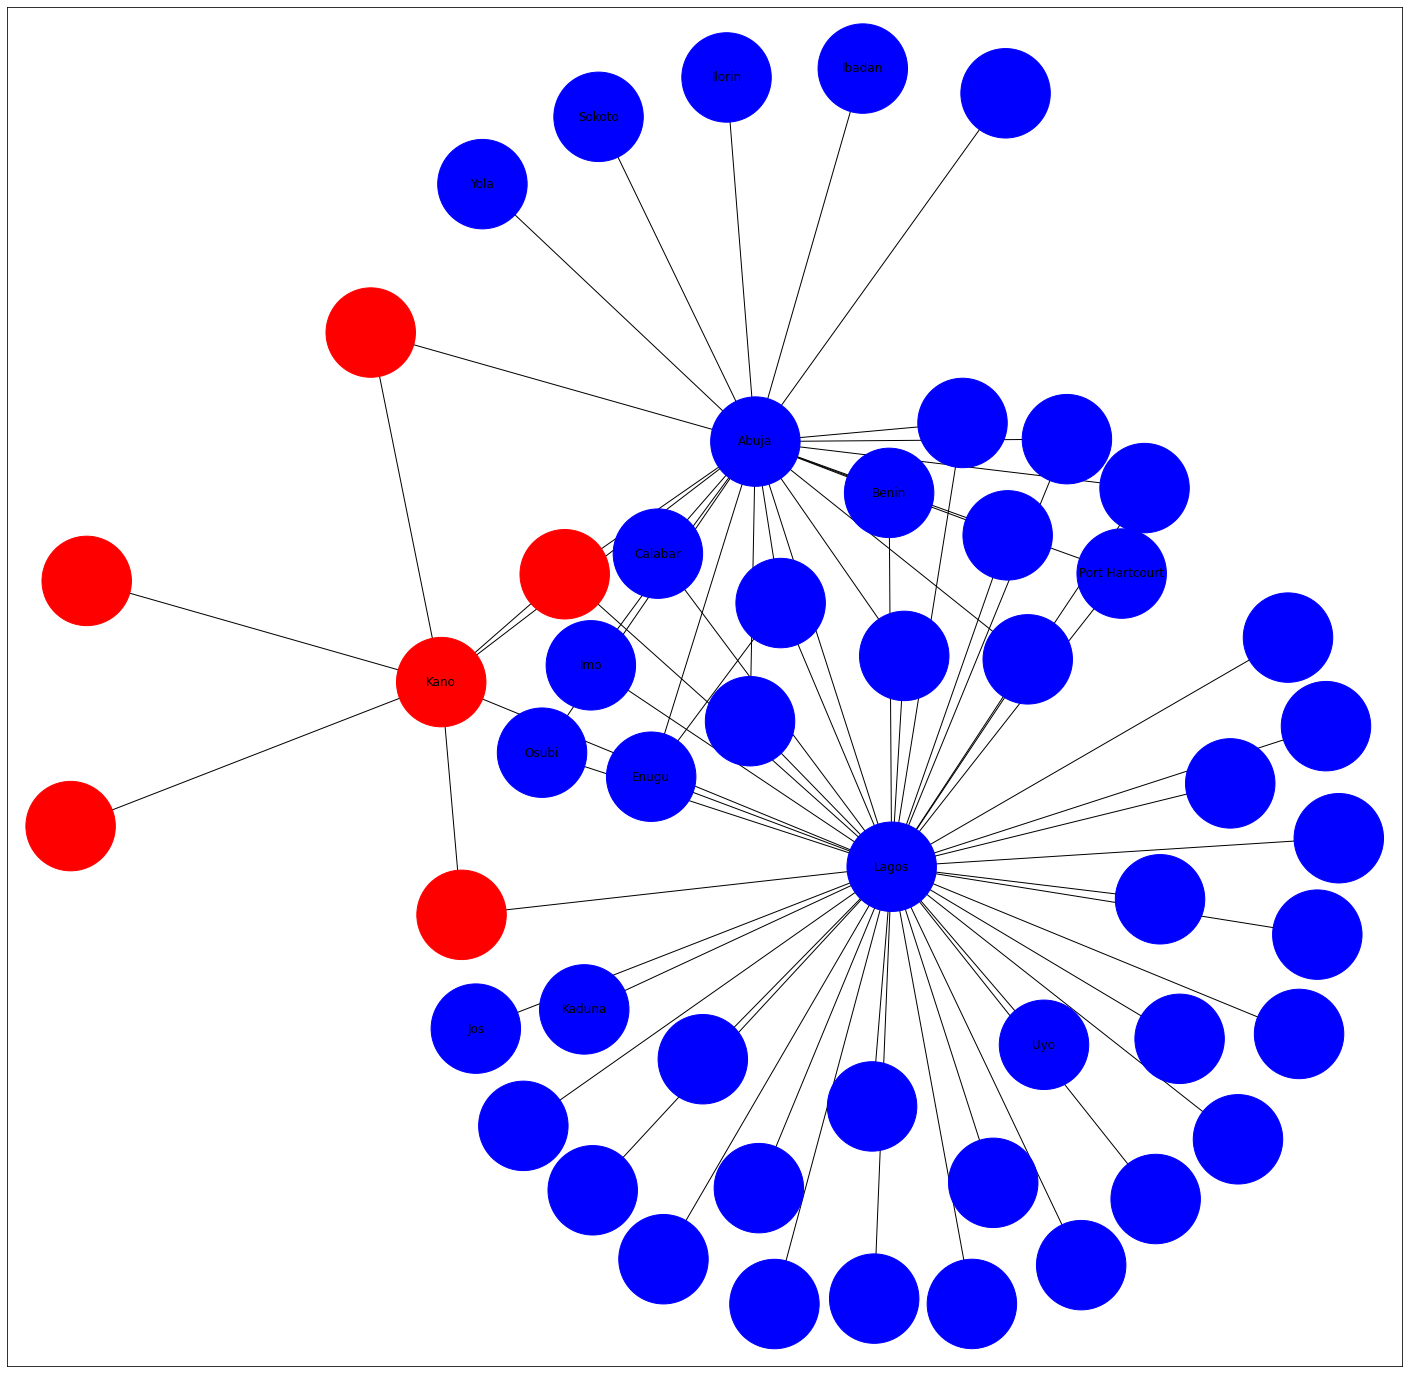

In [276]:
from networkx.algorithms.community.centrality import girvan_newman
communities=girvan_newman(g)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

color_map = []
for node in g:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('red')  

fig, ax = plt.subplots(1, 1, figsize=(25, 25))
nx.draw_networkx(g, ax=ax, node_color=color_map, with_labels=True, arrows=True, pos=pos, node_size=8000, labels=label_dict )
plt.show()

#perform girvan-newman community detection splitting the network into 2 communities

In [284]:
node_data = pd.DataFrame(index=g.nodes())
node_data["city"]=node_data.index.map(label_dict)
node_data["degree"] = node_data.index.map(dict(nx.degree(g)))
node_data["eigenvector"] = node_data.index.map(nx.eigenvector_centrality(g))
node_data["pagerank"] = node_data.index.map(nx.pagerank(g))
node_data["betweenness"] = node_data.index.map(nx.betweenness_centrality(g))


centrality_table=node_data.sort_values(by=["degree"], ascending=False)
centrality_table

#Table of airports and their centrality measures

,city,degree,eigenvector,pagerank,betweenness
170,Lagos,42,0.594261,0.286567,0.808571
161,Abuja,23,0.408239,0.143594,0.273469
169,Kano,7,0.179699,0.046114,0.093469
164,Enugu,3,0.150029,0.019602,0.000000
508,NaN,3,0.150029,0.019602,0.000000
523,NaN,3,0.153891,0.019648,0.000000
401,NaN,2,0.130499,0.014048,0.000000
1014,NaN,2,0.100749,0.014341,0.000000
2946,Osubi,2,0.130499,0.014048,0.000000
2868,Imo,2,0.130499,0.014048,0.000000


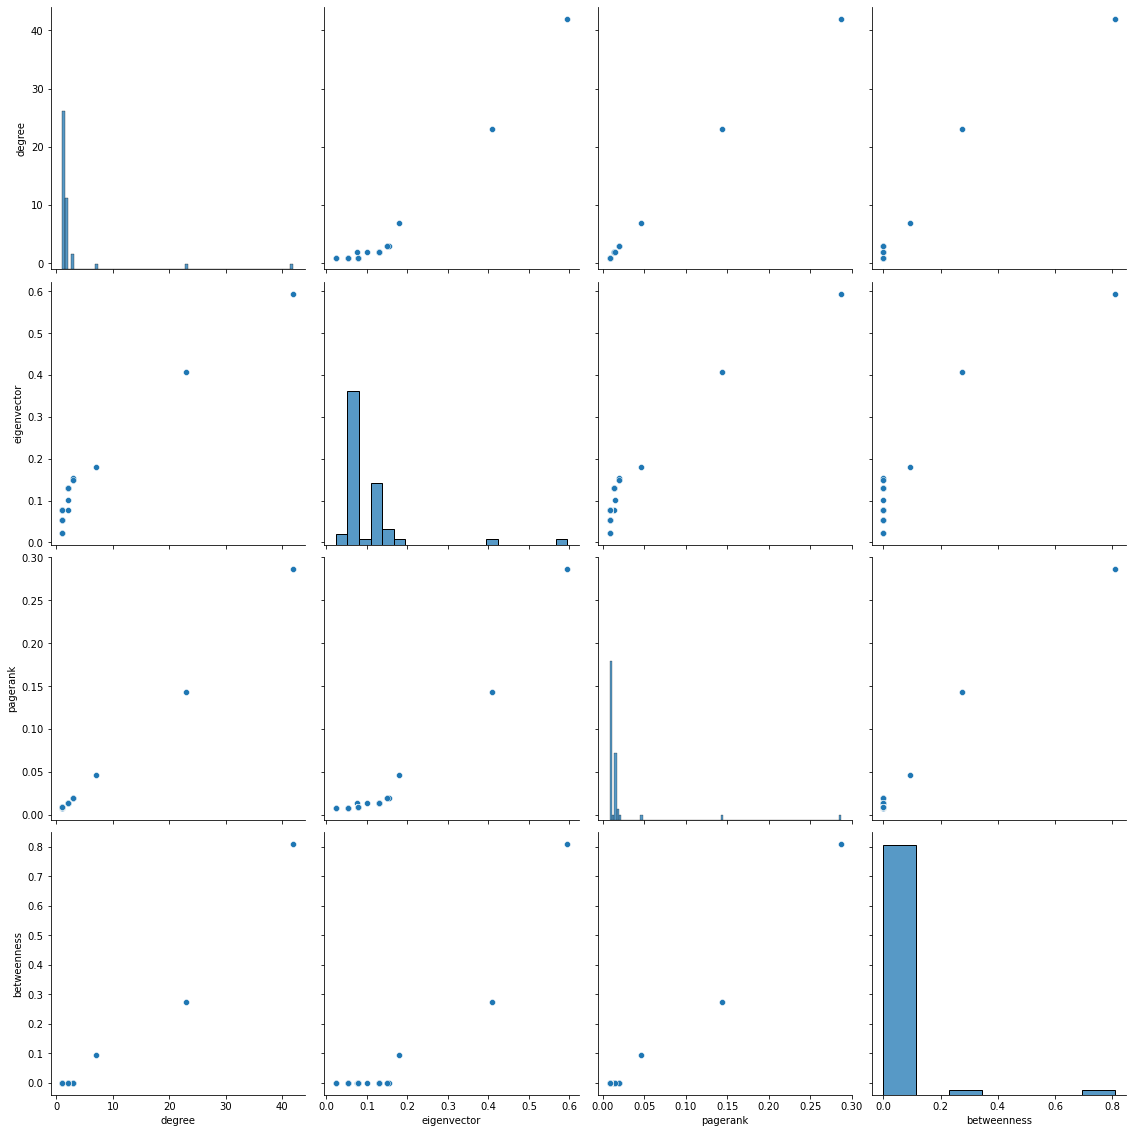

In [280]:
sns.pairplot(node_data, vars=['degree', 'eigenvector', 'pagerank', 'betweenness'], height=4)

#comparison of different centrality measures

In [281]:
pip install dataframe-image

Citations:

The openflights.org website.", https://openflights.org/data.html